In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

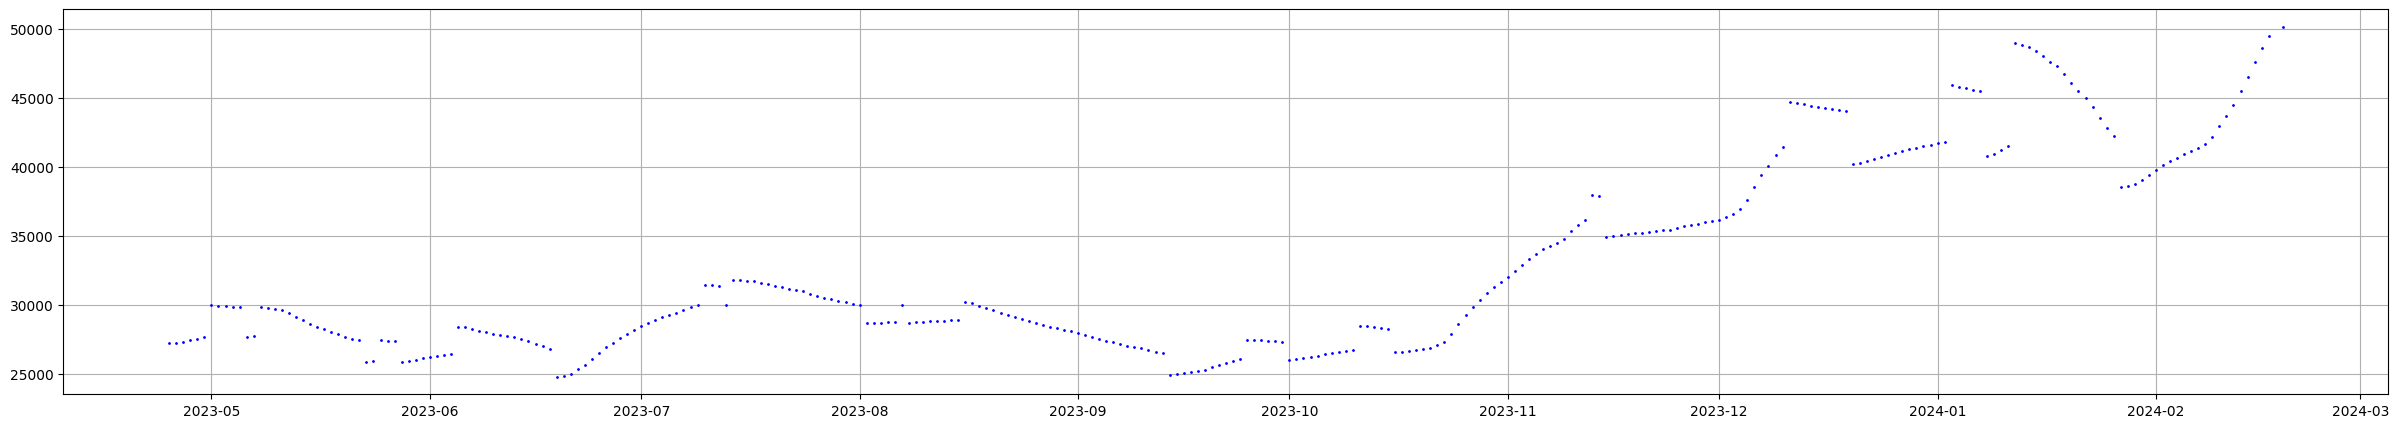

In [4]:
from algo_trader.lib.indicators.sar import SAR

df = data.iloc[-300:]
sar = SAR(0.02, 0.20, 0.02)
sar.calculate(df)
sar.plot()

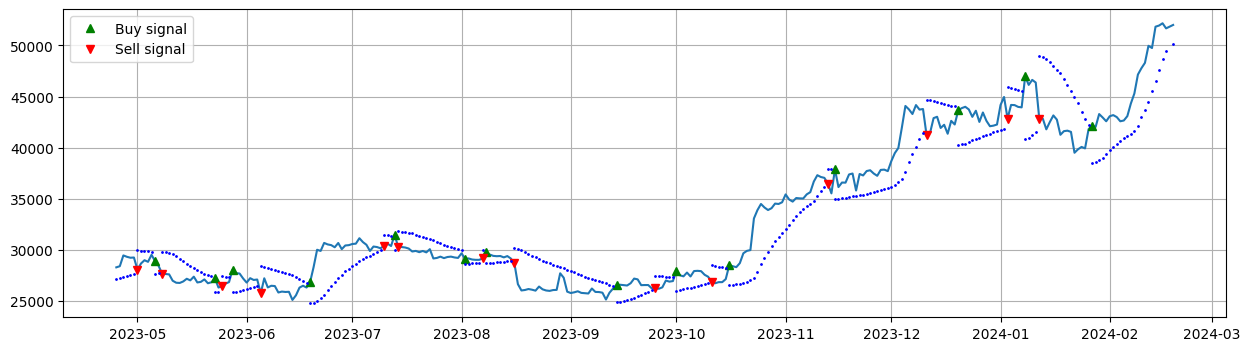

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,4), nrows=1, gridspec_kw={'height_ratios' : [1]})

df = sar.calculate(df)
df['buy_signal'] = sar.calc_buy_signals()
df['sell_signal'] = sar.calc_sell_signals()
buySignals = df[df['buy_signal'] == True]
sellSignals = df[df['sell_signal'] == True]

ax.plot(df.index, df.Close)
ax.plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax.plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax.legend(loc='upper left')
ax.plot(df.index, df.SAR, color='blue', marker='o', linewidth=0, markersize=1)
ax.grid()


In [6]:
new_record = data.iloc[-1:]
sar.predict_signal(new_record)

[SAR] Current SAR value: 50680.30620908324
[SAR] Current High value: 52347.546875
[SAR] Current Low value: 51948.57421875
[SAR] Signal: Action.HOLD


<Action.HOLD: 'hold'>